Expermient 8 Implement and test Convolutional Neural Network (CNN) for digits recognition.

Name Atharva Balpande
Roll no 313002
Div:C1
PRN 22111143


In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras import layers,datasets,models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib as plt
import numpy as np
%matplotlib inline

In [2]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) =mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

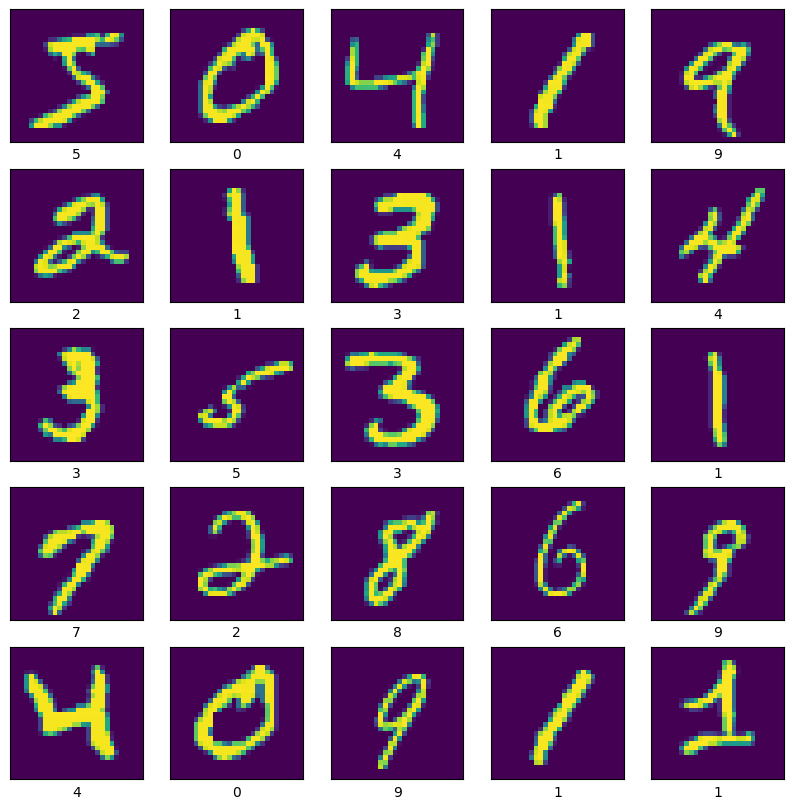

In [3]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i]) 
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [4]:

# Reshape the data to fit the model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train.shape
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test.shape

(10000, 28, 28, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
600/600 [==============================] - 14s 24ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 2/5
600/600 [==============================] - 13s 22ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 3/5
600/600 [==============================] - 15s 25ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0251 - val_accuracy: 0.9931
Epoch 4/5
600/600 [==============================] - 15s 24ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0230 - val_accuracy: 0.9933
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9919
Test accuracy: 0.9919000267982483


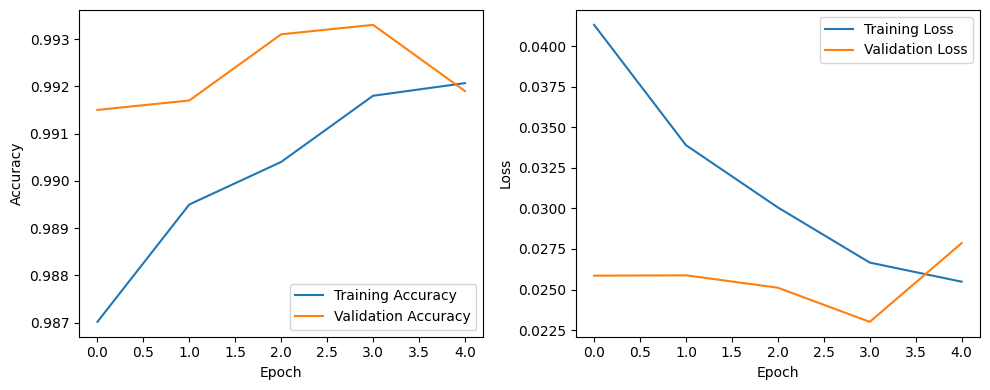

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_accuracy}")

# Plot training history (accuracy and loss)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model.save("TEMP.h5")

c:\Users\athar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


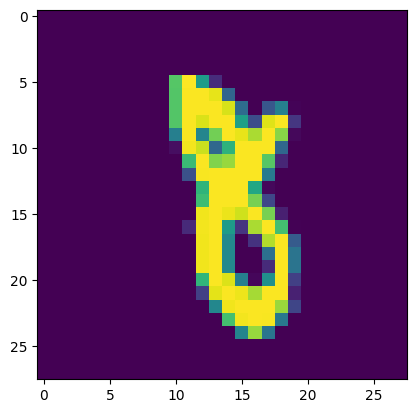

In [13]:
x_test =x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_test[1433])
plt.show()


In [21]:
predictions=model.predict(x_test)
print(predictions[1433])
np.argmax(predictions[1433])

313/313 [==============================] - 1s 4ms/step
[8.4843032e-06 8.3646242e-04 2.6124348e-05 2.3315877e-05 1.9068830e-07
 5.1133382e-05 4.0274241e-05 4.0306336e-06 9.9900872e-01 1.2135860e-06]


8

In [22]:
y_test 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
pred=[]
for j in range(len(predictions)):
    pred.append(np.argmax(predictions[j]))

In [26]:
pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [27]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1133,    0,    1,    0,    0,    1,    0,    0,    0],
       [   4,    0, 1023,    0,    1,    0,    0,    4,    0,    0],
       [   0,    0,    3, 1002,    0,    3,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   2,    0,    0,    4,    0,  884,    1,    0,    0,    1],
       [   7,    3,    0,    0,    1,    2,  945,    0,    0,    0],
       [   0,    4,    1,    0,    0,    0,    0, 1018,    1,    4],
       [   5,    0,    1,    1,    0,    2,    0,    2,  961,    2],
       [   2,    1,    0,    0,    3,    3,    0,    0,    2,  998]],
      dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=class_names))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
print('accuracy',sklearn.metrics.accuracy_score(y_test,pred))
print('F1 score',sklearn.metrics.f1_score(y_test,pred,average='weighted'))
print('Recall',sklearn.metrics.recall_score(y_test,pred,average='weighted'))
print('Precision',sklearn.metrics.precision_score(y_test,pred,average='weighted'))
      

accuracy 0.9919
F1 score 0.9919012708984872
Recall 0.9919
Precision 0.9919274331537717
